# Exploratory Data Analysis
---
In this notebook, we will do exploratory data analysis for the data we have gathered. Our workbook starts with some brief information about how we collected collected the data from this project and the data dictionary. After doing the preliminary EDA, we will take a detailed look at the Corruption Perception Index (CPI) score trends over time. This is done by looking at the trend of CPI for some of the countries to figure out whether there are some other indicators that show similar trend to CPI. We then focused our EDA to features that show a higher correlation with CPI. We then conclude the notebook with a brief look at some of the less correlated features. More work with the data and cleaning is done during our data cleaning process. 


In [5]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
import seaborn as sns 

import geopandas as gpd

## Data Gathering and Dictionary

As mentioned in the problem statement, the main goal of this study is to investigate corruption perception in different countries over time and see whether we can find some information to model corruption (Corruption Perception Index (CPI) was used for this purpose). The data gathering process for this project started by doing some research and brainstorming about the features that could be related or be an indicator of the corruption in a country. After identifying the factors that are important, we started our data gathering process by searching over all the available resources in the Internet to gather information about the identified target features. In that process, we focused our search towards data from credible sources and institutions that have data available for at least past 30 years. After collecting data from all of the sources, we started merging process by doing outer merge, with an emphasize on countries and years that have CPI data (as our target variable) available. All the collected information is saved into a metadata and used for our EDA and modeling. The following table shows the features we have collected, a long with a description of that feature and the source of information. 




### Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**country**|*object*|All Datasets|country| 
|**iso**|*object*|All Datasets|country ISO abbreviation| 
|**year**|*int64*|All Datasets|year data was collected| 
|**CPI**|*float64*|Corruption Perception Index (CPI) (0 to 100)|ransaprency International's score of perceptions of corruption. Higher values indicate less corruption (source: Transparency International).| 
|**childmor_0_5_per_1000**|*float64*|Child mortality (0-5 year-olds dying per 1000 born)|Death of children under five years of age per 1,000 live births (source: gapminder.org).| 
|**avrg_daily_income**|*float64*|Average daily income, $/person/day, inflation- & price adjusted|Mean daily household per capita income or consumption expenditure from the survey expressed in 2017 PPP (source: gapminder.org).| 
|**life_expectancy**|*float64*|Life expectancy, at birth|The number of years a newborn infant would live if the current mortality rates at different ages were to stay the same throughout its life (source: gapminder.org).| 
|**cellphone_per_100**|*float64*|Cell phones (per 100 people)|Mobile cellular telephone subscriptions  to a public mobile telephone service per 100 people (source: gapminder.org).| 
|**trade_balance_perc_of_gdp**|*float64*|Trade balance (% of GDP)|Exports of goods and services minus imports of goods and services (source: gapminder.org).| 
|**inflation_annual_perc**|*float64*|Inflation (annual %)|Inflation as measured by the annual growth rate of the GDP (source: gapminder.org).| 
|**gini_index**|*float64*|Gini coefficient|Gini shows income inequality in a society. A higher number means more inequality (source: gapminder.org).| 
|**democracy_index**|*float64*|Democracy index (EIU)|Index is using the data from the Economist Inteligence Unit to express the quality of democracies as a number between 0 and 100 (source: gapminder.org).| 
|**journos_imprisoned_yearly**|*float64*|Representative Government Index (IDEA)|Number of journalists imprisoned in given year (source: gapminder.org).| 
|**control_of_corruption**|*float64*|Control of Corruption (-2.5 to 2.5)|Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator (source: World Bank)|
|**government_effectiveness**|*float64*|Government Effectiveness (-2.5 to 2.5)|Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies (source: World Bank).|
|**political_stability**|*float64*|Political Stability and Absence of Violence (-2.5 to 2.5)/Terrorism|Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism (source: World Bank).
|**regulatory_quality**|*float64*|Regulatory Quality (-2.5 to 2.5)|Regulatory Quality captures perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development (source: World Bank).|
|**rule_of_law**|*float64*|Rule of Law (-2.5 to 2.5)|Rule of Law captures perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence (source: World Bank).|
|**voice_and_accountability**|*float64*|Voice and Accountability (-2.5 to 2.5)|Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media (source: World Bank).|
|**ethnic_div_index**|*float64*|Ethnic Division Index (0 to 1) |An index to compare the level of ethnic fractionation in a country (source: wikipedia)|
|**linguistic_div_index**|*float64*|Linguistic Division Index (0 to 1)|An index to compare the level of linguistic fractionation in a country (source: wikipedia)|
|**religious_div_index**|*float64*|Religious Division Index (0 to 1)|An index to compare the level of religious fractionation in a country (source: wikipedia)|
|**education_owid_index**|*float64*|Education Index (starts from 0)|Education index calculated based on average years of schooling (source: gapminder)|
|**press_freedom_index**|*float64*|Freedom of Press|An index to represent the freedom of speech and press in each country (source: reporters without borders)|
|**poverty_ratio**|*float64*|Poverty headcount ratio at national poverty line (% of population)|National poverty headcount ratio is the percentage of the population living below the national poverty line(s) (source: World Bank).|
|**rural_population_ratio**|*float64*|Rural population (% of total population)|Rural population refers to people living in rural areas as defined by national statistical offices. It is calculated as the difference between total population and urban population. Aggregation of urban and rural population may not add up to total population because of different country coverages (source: World Bank).|
|**suicide_rate**|*float64*|Suicide mortality rate (per 100,000 population)|Suicide mortality rate is the number of suicide deaths in a year per 100,000 population. Crude suicide rate (source: World Bank).|
|**alcohol_consumption**|*float64*|Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)|Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded alcohol) amount of alcohol consumed per person (15 years of age or older) over a calendar year, in litres of pure alcohol, adjusted for tourist consumption (source: World Bank).|
|**unemployment_perc_tot_labor**|*float64*|Unemployment, total (% of total labor force)|Unemployment refers to the share of the labor force that is without work but available for and seeking employment (source: World Bank).|
|**gender_inequality_ind**|*float64*|Gender Inequality Index|The gender inequality index (GII) provides insights into gender disparities in health, empowerment and the labour market. Higher values in the GII indicate worse achievements. The Gender Inequality Index is a composite measure reflecting inequality in achievements between The GII is a composite measure, reflecting inequality in achievements between women and men in three dimensions: reproductive health, empowerment and the labour market (source: World Health Organization).|
|**gdp_per_capita_2017dollar**|*float64*|GDP|Gross domestic product in 2017 dollars (source: ourworldindata.org)| 
|**fertility_rate**|*float64*|Births|Measured by average births per woman (source: ourworldindata.org)| 
|**undernourishment_prevalence_perc**|*float64*|Calorie deficit|Percentage of population with a calorie deficit (source: ourworldindata.org)| 
|**electricity_access**|*float64*|Electricity|Percentage of population with access to electricity (source: ourworldindata.org)| 
|**pop_percent_with_sanitation**|*float64*|Sanitation|Percentage of population using st least basic sanitation (source: ourworldindata.org)| 


This dataset is composed of 38 columns. The 'country', 'iso', and 'year' represent the name the country, the iso 3 code for the country, and the year related to the observations of that country. The iso 3 is a standard 3 letter way of naming countries that helps us identify countries since there is not a unique way of representing a county name and some countries tend to have multiple names or ways their name is represented, e.g., USA, US, United States, or United States of America.


In [6]:
df = pd.read_csv('./../datasets/melted_merged_allcolumns_v2.csv')
df.head()

<ipython-input-6-25a59e00ef95>:1: DtypeWarning: Columns (4,7,11,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./../datasets/melted_merged_allcolumns_v2.csv')


,country,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
0,New Zealand,NZL,1995,95.5,1.87,76.8,84.3,1.43,32.6,NaN,...,NaN,6.46,NaN,NaN,3673899.0,NaN,29757.475,2.11,NaN,100.0
1,Denmark,DNK,1995,93.2,4.71,75.6,84.6,1.28,23.0,NaN,...,NaN,6.99,NaN,NaN,5235205.0,NaN,43015.676,1.81,0.0,100.0
2,Singapore,SGP,1995,92.6,16.8,77.1,51.4,3.18,44.3,NaN,...,NaN,3.30,NaN,NaN,3543878.0,NaN,48677.586,1.67,NaN,100.0
3,Finland,FIN,1995,91.2,7.46,76.9,82.9,4.2,23.5,NaN,...,NaN,17.00,NaN,NaN,5107942.0,NaN,31499.807,1.81,0.0,100.0
4,Canada,CAN,1995,88.7,3.13,78.1,79.6,2.25,31.4,NaN,...,NaN,9.49,NaN,NaN,29289430.0,NaN,NaN,1.64,NaN,100.0


In [7]:
df.shape

(74742, 38)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           70316 non-null  object 
 1   iso                               74742 non-null  object 
 2   year                              74742 non-null  int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         8730 non-null   object 
 5   life_expectancy                   56646 non-null  float64
 6   journos_imprisoned_yearly         7590 non-null   float64
 7   inflation_annual_perc             10047 non-null  object 
 8   gini_index                        49477 non-null  float64
 9   democracy_index                   2520 non-null   float64
 10  childmor_0_5_per_1000             57527 non-null  float64
 11  cellphone_per_100                 10246 non-null  object 
 12  avrg

As we can see there are 5 columns with mixed types (`trade_balance_perc_of_gdp`,  `inflation_annual_perc `, `cellphone_per_100`, `linguistic_div_index `, and `religious_div_index `). Let us take a closer look at these columns to see if we can figure out what it happening there.

In [9]:
print(df['trade_balance_perc_of_gdp'].apply(lambda x: type(x)).value_counts())

# We can use the following lines to to print the type of each row in a separate column
#df['type'] = df['trade_balance_perc_of_gdp'].apply(lambda x: type(x))
#df[df['type'] == str]

trade_balance_perc_of_gdp
<class 'float'>    66012
<class 'str'>       8730
Name: count, dtype: int64


As we can see, the types are float and string.

In [10]:
columns_type = ['trade_balance_perc_of_gdp', 'inflation_annual_perc' , 'cellphone_per_100', 'linguistic_div_index', 'religious_div_index']
for col in columns_type:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           70316 non-null  object 
 1   iso                               74742 non-null  object 
 2   year                              74742 non-null  int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         8728 non-null   float64
 5   life_expectancy                   56646 non-null  float64
 6   journos_imprisoned_yearly         7590 non-null   float64
 7   inflation_annual_perc             10039 non-null  float64
 8   gini_index                        49477 non-null  float64
 9   democracy_index                   2520 non-null   float64
 10  childmor_0_5_per_1000             57527 non-null  float64
 11  cellphone_per_100                 10245 non-null  float64
 12  avrg

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74742.0,1.716904e+03,1.239511e+03,-10000.000000,1854.000000,1.946000e+03,2.011000e+03,2.100000e+03
CPI,4068.0,4.307675e+01,2.109506e+01,4.000000,27.000000,3.700000e+01,5.600000e+01,1.000000e+02
trade_balance_perc_of_gdp,8728.0,-5.478314e+00,1.710133e+01,-165.000000,-10.800000,-3.120000e+00,1.760000e+00,8.170000e+01
life_expectancy,56646.0,5.336310e+01,2.131952e+01,1.010000,32.900000,5.000000e+01,7.400000e+01,9.440000e+01
journos_imprisoned_yearly,7590.0,4.931615e+01,2.832070e+01,0.000000,26.625000,5.180000e+01,7.510000e+01,9.700000e+01
inflation_annual_perc,10039.0,2.235271e+01,1.818428e+02,-98.700000,1.960000,5.100000e+00,1.100000e+01,6.260000e+03
gini_index,49477.0,4.060074e+01,8.591881e+00,15.700000,35.000000,4.010000e+01,4.520000e+01,8.160000e+01
democracy_index,2520.0,5.499232e+01,2.204249e+01,8.600000,35.200000,5.810000e+01,7.250000e+01,9.930000e+01
childmor_0_5_per_1000,57527.0,2.090726e+02,1.854118e+02,0.250000,15.700000,1.790000e+02,4.030000e+02,7.560000e+02
cellphone_per_100,10245.0,3.636180e+01,5.171516e+01,0.000000,0.000000,1.040000e+00,7.510000e+01,4.210000e+02


As we can see, the year column has some values back dating to -10,000. This is because some of this data is in fact the extrapolation of the models one has fit. This information could be a beneficial especially for EDA on some of these features but in this project, our focus will be mainly on data that help us get more info about Corruption Perception Index (CPI).

In [12]:
df['CPI'].isna().sum()

70674

Let us create a new dataframe that only contains records that have a value for CPI and do some further analysis on it. 

In [13]:
df_model = df[df['CPI'].notna()]

In [14]:
df_model.shape

(4068, 38)

We have 4068 records with CPI data. For the EDA part, we will focus our analysis on these records. As we can see, there a numerous NaN's in this data. We will dive deeper into these NaN's and how to imputed them in the data cleaning workbook. 

In [15]:
df_model.isna().sum().sort_values(ascending=False)

alcohol_consumption                 3313
literacy                            3203
poverty_ratio                       3089
extreme_poverty                     2530
democracy_index                     1614
undernourishment_prevalence_perc    1201
education_owid_index                1019
suicide_rate                         951
pop_percent_with_sanitation          764
press_freedom_index                  735
gender_inequality_ind                487
electricity_access                   449
religious_div_index                  402
linguistic_div_index                 402
ethnic_div_index                     382
trade_balance_perc_of_gdp            380
gdp_per_capita_2017dollar            362
journos_imprisoned_yearly            351
rule_of_low                          298
voice_and_accountability             298
regulatory_quality                   298
government_effectiveness             298
control_of_corruption                298
political_stability                  298
population      

## Corruption Perception Index (CPI) 

Corruption is defined as the abuse of entrusted power for private gain (source: Transparency International). 

**Why is it important to know corruption, investigate it, and inform the public about it?** Corruption hinders economic growth by increasing costs, lowering productivity, discouraging investment, reducing confidence in public institutions, limiting the development of small and medium-sized enterprises, weakening systems of public financial management, and undermining investments in health and education. Corruption can also increase poverty by slowing economic growth, skewing government expenditure in favor of the rich and well-connected, concentrating public investment in unproductive projects, promoting a more regressive tax system, siphoning funds away from essential public services, adding a higher level of risk to the investment decisions of low-income individuals, and reinforcing patterns of unequal asset ownership, thereby limiting the ability of the poor to borrow and increase their income (source: mcc.gov).

**What are the costs of corruption?** Political costs by affecting freedom and rule of law, social costs by impacting peoples participation and trust in government, and economic cost by impacting the opportunities to build and grow, by deteriorating the trust in the country and affecting the future possible investment and growth opportunities.

The Corruption Perception Index (CPI) is a score introduced by Transparency International to measure how corrupt each country’s public sector is perceived to be, according to experts and businesspeople (source: Transparency International). In the latest releases of the CPI, the index is calculated on a 0 to 100 basis scale in which higher scores means the countries have done a good job controlling corruption. According to the Transparency International, each country’s score is a combination of at least 3 data sources drawn from 13 different corruption surveys and assessments. These data sources are collected by a variety of reputable institutions, including the World Bank and the World Economic Forum.


Let us start our investigations by looking at the world map and seeing how CPI is distributed in 2022.

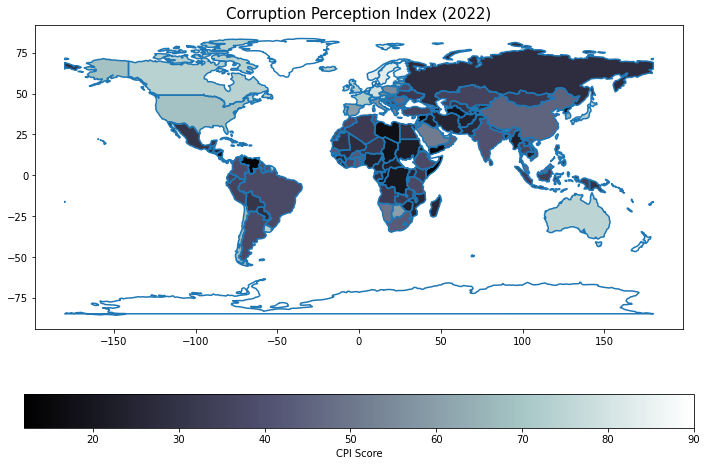

In [16]:
# prepare data to plot the world map for corruption perception index in 2022
geojson_path = 'https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json'
cpi_2022 = df_model[df_model['year'] == 2022][['iso', 'CPI']]
world = gpd.read_file(geojson_path)
world = world.merge(cpi_2022, how='left', left_on='id', right_on='iso')
world.drop(columns=['iso'], inplace=True)
# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax)
world.plot(column='CPI', ax=ax, legend=True,
           legend_kwds={'label': "CPI Score", 'orientation': "horizontal"},
           cmap= 'bone')

# Set plot title
plt.title('Corruption Perception Index (2022)', fontsize = 15);

From the map, we can see clear trends in countries and where they are located. North American countries (except Mexico) scored pretty high for CPI. On the other hand, the Central American countries are seen to have done a poor job in corruption control. The CPI score in South America is not the highest but shows definitive improvements compared to Central America. On the other side of the world, the European countries show a high CPI score while the farther we move to east, the score tends to decrease. The score distribution in Africa is relatively low while some southern African countries are able to score high CPI. Asian countries also show a mix distribution in which the far eastern Asians score relatively good but countries in the middle east and the vicinity do not perform well.  

Looking at the 2022 CPI scores, Denmark (DNK) scored the highest CPI while Somalia (SOM) has shown the lowest score. Let us take a closer look at these two countries and see whether they have shown the same trend over time or something interesting has happened there. 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

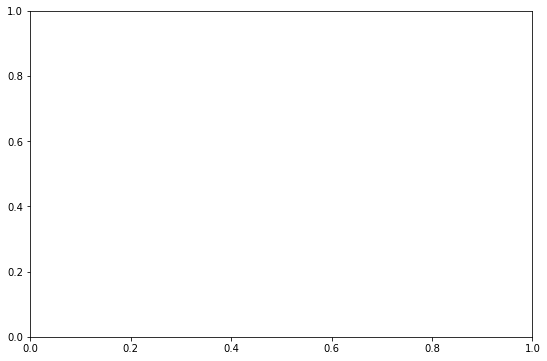

In [17]:
plt.figure(figsize=(9, 6))

x1 = df_model[(df_model['iso'] == 'DNK') & (df_model['year'] > 2003)]['year']
y1 = df_model[(df_model['iso'] == 'DNK') & (df_model['year'] >2003)]['CPI']
x2 = df_model[df_model['iso'] == 'SOM']['year']
y2 = df_model[df_model['iso'] == 'SOM']['CPI']

plt.plot(x1, y1, color='blue', marker='o', label="Denmark")
plt.plot(x2, y2, linestyle='-.', marker='s',color='red',  label="Somalia")
plt.legend()

plt.title('CPI for Denmark and Somalia', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Corruption Perception Index (CPI)', fontsize=12);

As we can see from this plot (and also similar trends that weill be discussed later), countries will good CPI score are usually good in keeping their score high. The problem, however, is that counties with low CPI score (e.g. Somalia from the above graph) usually do not do well in improving their anti corruption metrics, resulting their score to stay low over time.

Let us see if things are improving with time or not. In the next cell we will find the minimum CPI index for each of the countries over the past decade (2012 to 2022) and compare it to their CPI in 2022. Unfortunately, we can see for 55 countries (out of 180), the CPI score in 2022 was the minimum of their score over the past decade. This means the CPI score is hardly ever improving for a big portion of the countries. 

In [ ]:
# find the minimum CPI score over the last decade
mins = df_model[df_model['year'] >= 2012].groupby('iso').min()['CPI']

# see how many countries have their 2022 CPI as the minimum over the past decade
print('Total number of countries in which their 2022 CPI score is the minimum over the past 10 years:')
sum(df_model[df_model['year'] == 2022].apply(lambda x: mins[x['iso']], axis=1) >= df_model[df_model['year'] == 2022]['CPI'])



Let us dive deeper into the CPI index first and see what we can get out of that. Let us start with some basic statistics related to CPI.

In [ ]:
df_model['CPI'].describe()

CPI score used to take values from 0 to 10 till 2010. After that, the index has been modified so the score is calculated out of 100 points instead. In this work, pre 2011 data have been rescaled so that all CPI scores are calculated in a scale of 0 to 100 and are more interpretable. As we can see from the describe method, the mean CPI score for all countries over time is 43 with some countries (mostly the Northern European ones) scored a perfect score at the beginning of index invention (before 2000). 

In [ ]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize = (9,6))
# Plot the line plot on the first axis
ax1.plot(df_model.groupby('year').mean()['CPI'].index, df_model.groupby('year').mean()['CPI'].values, label='mean CPI')
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('Corruption Perception Index (CPI)', fontsize = 12)
# Create a second y-axis on the right side
ax2 = ax1.twinx()
# Plot the bar plot on the second axis
ax2.bar(df_model.groupby('year').mean()['CPI'].index, df_model.groupby('year').count()['CPI'].values, alpha=0.5, label='# of countries with CPI')
ax2.set_ylabel('Number of Countries',  fontsize = 12)
# Title and legend
plt.title('Average CPI and # countries with CPI over time')
fig.tight_layout()
# Display the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.92));

From this plot, we can see the mean CPI score decreases over time. This means the corruption gets worse over time. Another point to draw from this plot is the fact that at 1995 when Transparency International has started collecting the CPI, it had data for about 35 countries but this number increased quite rapidly and in 2022, they collected information for over 180 countries. More details about the statistics for each year can be see in the following table. Now let us take a detailed look at how some basic statistics of CPI has changed over time. 

In [ ]:
def percentile25(x):
    return x.quantile(0.25)

def percentile75(x):
    return x.quantile(0.75)

df_model.groupby('year')['CPI'].agg(['mean', 'std', percentile25, 'median', percentile75, 'min', 'max', 'count'])

In [ ]:
plt.figure(figsize=(12, 9))

default_palette = sns.color_palette("deep")

# Use the first color (index 0) for the default blue
default_blue_color = default_palette[0]

boxprops = dict(facecolor=default_blue_color, edgecolor='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')

sns.boxplot(data=df_model, x='year', y='CPI', boxprops=boxprops, whiskerprops=whiskerprops)
plt.xlabel('Year', fontsize =12)
plt.ylabel('Corruption Perception Index', fontsize =12)
plt.title('CPI distribution over time', fontsize =15)
plt.xticks(rotation=70);

Looking at this table, we can see the standard deviation of CPI has decreased over time, however, the extremes are pretty much unchanged. The concerning part is that the average corruption score has not changed during the past two decades, this means the world is not moving towards effectively fighting corruption. 


Now, let us take a look at the distribution of CPI score over the entire time period (from 1995 to 2022).

In [ ]:
plt.figure(figsize=(12, 9))
sns.histplot(df_model['CPI'])
plt.xlabel('Corruption Perception Index', fontsize =12)
plt.ylabel('Count', fontsize =12)
plt.title('CPI distribution', fontsize =15)

As we can see from this plot, although the data are right-skewed, but we don't see any outliers in our data. Part of that could be the fact that CPI is an index that is calculated by some data and formulas (as opposed to something that is directly observed) and also the fact that it is bounded between 0 and 100. 

## CPI over time for different countries
Now, let us take a look at the individual countries CPI over time and see if we can see any interesting trend over years for countries. To do that, we will first start by picking up countries in groups of 10 and plotting the CPI for them from 1995 to 2022. 

In [ ]:
#total countries in our dataset
all_countries = df_model['iso'].unique()

# countries in 2022 dataset
countries_2022 = df_model[df_model['year'] == 2022].sort_values(by='CPI')['iso'].unique()

In [ ]:
# we will start taking groups of 10 from this list and plot CPI for them over time.
distinct_colors = sns.color_palette("hls", 10)
line_styles = ['o', 's', 'v', ',', 'd', '^', 'p', '*', 's', 'o']
sns.set(style='ticks')
for group in range(0, 18, 2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
    #axes = axes.flatten()
    countries = countries_2022[group*10:(group+1)*10]
    ax = axes[0]
    data = df_model[df_model['iso'].isin(countries)]
    sns.lineplot(data = data, x='year', y='CPI', hue='iso', ax=ax, palette=distinct_colors, style='iso', dashes=False, markers=line_styles)
    ax.set_xlabel('Year', fontsize = 15)
    ax.set_ylabel('CPI', fontsize = 15)

    countries = countries_2022[(group+1)*10:(group+2)*10]
    ax = axes[1]
    data = df_model[df_model['iso'].isin(countries)]
    df.head()
    sns.lineplot(data = data, x='year', y='CPI', hue='iso', ax=ax, palette=distinct_colors, style='iso', dashes=False, markers=line_styles)
    ax.set_xlabel('Year', fontsize = 15)
    ax.set_ylabel('CPI', fontsize = 15)
    fig.tight_layout;

# plot the leftover countries
plt.figure(figsize=(8, 6))
data = df_model[df_model['iso'].isin([i for i in all_countries if i not in countries_2022])]
sns.lineplot(data = data, x='year', y='CPI', hue='iso', palette=distinct_colors, style='iso', dashes=False, markers=line_styles)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('CPI', fontsize = 15)


Earlier plots in the above series focus more on countries that have a lower CPI score (bad corruption). What we can see that except a few, we do not see considerable improvement in the corruption score over time for those countries. Looking at the above cases, we can see some interesting trends with some countries in which CPI score changes over time. As an example, let us take a look at the following cases:
- ZWE (Zimbabwe): As we can see from the score, the corruption score was around 40 at the beginning the century but is has gone down 20 after 20 years. Doing a bit of research, we can see there has been a lot of political and economical chaos in recent years in this country. We will investigate it more. 
- BHR (Bahrain): Is another country that shows it CPI score dipping in the recent years of the 21st century. 
- RWA (Rwanda): Shows steady increase in their CPI score after 2005.
- LVA (Latvia): Is another country that shows a nice steady increase in their CPI score. 

Now, let us start with ZWE and plot the CPI and some other features we think might be important. In this task, we are trying to see if there could be some trends in other features that could help us 'explain' or 'predict' variations in CPI. As will be shown later, there are some features in our database that show strong correlation with CPI (specifically features about worldwide governance indicators) but for this part of the analysis, we will pick up some features that are more obvious to observe in every society and the day to day life of people (daily income, regulatory quality, democracy, and gender inequality). Let us first start with Zimbabwe.  

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.subplots_adjust(right=0.75)
country = 'ZWE'

data=df_model[df_model['iso'] == country]
x = df_model[df_model['iso'] == country]['year']
y1 = df_model[df_model['iso'] == country]['CPI']
y2 = df_model[df_model['iso'] == country]['avrg_daily_income']   
y3 = df_model[df_model['iso'] == country]['regulatory_quality']       
y4 = df_model[df_model['iso'] == country]['democracy_index']   
y5 =  df_model[df_model['iso'] == country]['gender_inequality_ind']                              

twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()


# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin3.spines.right.set_position(("axes", 1.1))
twin4.spines.right.set_position(("axes", 1.2))
twin5.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(x, y1, color='blue', marker='o', label="CPI")
p2, = twin2.plot(x, y2, linestyle='-.', color='red',  label="Daily income")
p3, = twin3.plot(x, y3, linestyle='--', color='green',label="Regulatory quality")
p4, = twin4.plot(x, y4, linestyle='-.', color='olive', label="Democracy index")
p5, = twin5.plot(x, y5, linestyle='--', color='black', label="Gender inequality")

ax.set_xlabel("Year")
ax.set_ylabel("CPI")
twin2.set_ylabel("Daily income")
twin3.set_ylabel("Regulatory quality")
twin4.set_ylabel("Democracy index")
twin5.set_ylabel("Gender inequality")

ax.legend(handles=[p1, p2, p3, p4, p5])
plt.title('Zimbabwe over time', fontsize = 15);

In the above plot, the blue line with markers represent the Corruption Perception Index while the dashed lines are representing other indices. From this plot, we can see that when CPI score decreases, the daily income has decreased as well. There is no clear relation between other features and CPI for Zimbabwe. Now, let us take a look at Bahrain (BHR).

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.subplots_adjust(right=0.75)
country = 'BHR'

data=df_model[df_model['iso'] == country]
x = df_model[df_model['iso'] == country]['year']
y1 = df_model[df_model['iso'] == country]['CPI']
y2 = df_model[df_model['iso'] == country]['avrg_daily_income']   
y3 = df_model[df_model['iso'] == country]['regulatory_quality']       
y4 = df_model[df_model['iso'] == country]['democracy_index']   
y5 =  df_model[df_model['iso'] == country]['gender_inequality_ind']                              

twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()


# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin3.spines.right.set_position(("axes", 1.1))
twin4.spines.right.set_position(("axes", 1.2))
twin5.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(x, y1, color='blue', marker='o', label="CPI")
p2, = twin2.plot(x, y2, linestyle='-.', color='red',  label="Daily income")
p3, = twin3.plot(x, y3, linestyle='--', color='green',label="Regulatory quality")
p4, = twin4.plot(x, y4, linestyle='-.', color='olive', label="Democracy index")
p5, = twin5.plot(x, y5, linestyle='--', color='black', label="Gender inequality")

ax.set_xlabel("Year")
ax.set_ylabel("CPI")
twin2.set_ylabel("Daily income")
twin3.set_ylabel("Regulatory quality")
twin4.set_ylabel("Democracy index")
twin5.set_ylabel("Gender inequality")

ax.legend(handles=[p1, p2, p3, p4, p5])
plt.title('Bahrain over time', fontsize = 15);

Looking at the plots from Bahrain, what we can see is that gender inequality decreases over time, but this does not seem to have relation with CPI score because having less gender inequality is considered a positive change, despite having the CPI score decrease over time.  Another observation for Bahrain is that the democracy index is also decreasing with time but other factors increase over time, and it seems difficult to draw any conclusion on what factor could be a good representative of what could happen with CPI over time. Now, let us take a look at the plots for Rwanda which shows a very steep increase in CPI score over time. 

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.subplots_adjust(right=0.75)
country = 'RWA'

data=df_model[df_model['iso'] == country]
x = df_model[df_model['iso'] == country]['year']
y1 = df_model[df_model['iso'] == country]['CPI']
y2 = df_model[df_model['iso'] == country]['avrg_daily_income']   
y3 = df_model[df_model['iso'] == country]['regulatory_quality']       
y4 = df_model[df_model['iso'] == country]['democracy_index']   
y5 =  df_model[df_model['iso'] == country]['gender_inequality_ind']                              

twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()


# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin3.spines.right.set_position(("axes", 1.1))
twin4.spines.right.set_position(("axes", 1.2))
twin5.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(x, y1, color='blue', marker='o', label="CPI")
p2, = twin2.plot(x, y2, linestyle='-.', color='red',  label="Daily income")
p3, = twin3.plot(x, y3, linestyle='--', color='green',label="Regulatory quality")
p4, = twin4.plot(x, y4, linestyle='-.', color='olive', label="Democracy index")
p5, = twin5.plot(x, y5, linestyle='--', color='black', label="Gender inequality")

ax.set_xlabel("Year")
ax.set_ylabel("CPI")
twin2.set_ylabel("Daily income")
twin3.set_ylabel("Regulatory quality")
twin4.set_ylabel("Democracy index")
twin5.set_ylabel("Gender inequality")

ax.legend(handles=[p1, p2, p3, p4, p5])
plt.title('Rwanda over time', fontsize = 15);

As we have seen from the previous countries as well, gender inequality decreases over time. However, the interesting point here is that the daily income and regulatory quality indices both increase over time, but the democracy index does not. The increase in CPI index could be correlated with the improvements we are seeing in a few indices of this county over time but seems like the decaying democracy index does not have that much on it. Now, let us take a look at another country that shows a steep increase in CPI score over time (Latvia). 

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
fig.subplots_adjust(right=0.75)
country = 'LVA'

data=df_model[df_model['iso'] == country]
x = df_model[df_model['iso'] == country]['year']
y1 = df_model[df_model['iso'] == country]['CPI']
y2 = df_model[df_model['iso'] == country]['avrg_daily_income']   
y3 = df_model[df_model['iso'] == country]['regulatory_quality']       
y4 = df_model[df_model['iso'] == country]['democracy_index']   
y5 =  df_model[df_model['iso'] == country]['gender_inequality_ind']                              

twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()
twin5 = ax.twinx()


# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin3.spines.right.set_position(("axes", 1.1))
twin4.spines.right.set_position(("axes", 1.2))
twin5.spines.right.set_position(("axes", 1.3))

p1, = ax.plot(x, y1, color='blue', marker='o', label="CPI")
p2, = twin2.plot(x, y2, linestyle='-.', color='red',  label="Daily income")
p3, = twin3.plot(x, y3, linestyle='--', color='green',label="Regulatory quality")
p4, = twin4.plot(x, y4, linestyle='-.', color='olive', label="Democracy index")
p5, = twin5.plot(x, y5, linestyle='--', color='black', label="Gender inequality")

ax.set_xlabel("Year")
ax.set_ylabel("CPI")
twin2.set_ylabel("Daily income")
twin3.set_ylabel("Regulatory quality")
twin4.set_ylabel("Democracy index")
twin5.set_ylabel("Gender inequality")

ax.legend(handles=[p1, p2, p3, p4, p5])
plt.title('Latvia over time', fontsize = 15);

As expected, the gender inequality index is decreasing over time for this country as well. Additionally, we can see that the average income and regulatory quality increases for Latvia. Overall, it seems like the county is heading towards the right direction! 

To sum up, what we have observed for the countries that have shown considerable change in the CPI score is that there is more or less a relation between how much people of that country earn and much corruption exists in the country. Countries with a higher average income tend to show on average less corruption. 

## Features with strongest correlation to CPI
In this section, we will do some investigations on features we believe have a high correlation with CPI as our target variable. To do that, let us plot the correlation heatmap for all of the features first. 

In [ ]:
columns = df_model.corr().sort_values(by='CPI', ascending=False)['CPI'].index
corr = df_model.corr().sort_values(by='CPI', ascending=False)['CPI'].values.reshape(-1, 1)
plt.figure(figsize=(5, 10))
sns.heatmap(corr, cmap= 'bone',
            annot=True, annot_kws={"fontsize":6}, 
            fmt=".2f", vmin = -1, vmax=1, yticklabels=columns, xticklabels=False)

As we can see from the heatmap, there are a number of features that have very strong correlations with CPI. In the next cell, we will extract those features and focus on them to get more information on them. 

In [ ]:
# this returns the top 10 features (along with CPI) that have the highest absolution correlation with CPI
correlated_features = df_model.corr().apply(lambda x: abs(x['CPI']), axis = 1).sort_values(ascending=False).index[0:11]
print(correlated_features)
sns.pairplot(df_model[correlated_features])

If we look at these plots, the first thing that catches our eyes is the fact that there are some features that are highly correlated with the corruption perception index. Those features include 'control_of_corruption', 'rule_of_low', 'government_effectiveness', and 'regulatory_quality' (please refer to the data dictionary for more information about those indices and their definitions). These features are collected from the World Banks Worldwide Governance Indicator (WGI) database and are calculated independently from our target variable CPI (Corruption Perception Index that is generated by Transparency International). The WGI aggregate data from more than 30 think tanks, international organizations, nongovernmental organizations, and private firms across the world selected on the basis of three key criteria: 1) they are produced by credible organizations; 2) they provide comparable cross-country data; and 3) they are regularly updated. The data reflect the diverse views on governance of many stakeholders worldwide, including tens of thousands of survey respondents and experts (source: World Bank). The fact that the WGI data have a very nice and strong correlation with the Corruption Perception Index requires a separate investigation and will not be discussed here. 

In addition to the above mentioned features, there are a few features that show strong correlations with each other, like average daily income and gdp per capita, which is predictable. Another two features that show a strong correlation are democracy index vs. voice and accountability (of the government). This is also predictable since it is intuitive that in countries where democracy flourishes, the governing bodies will be more accountable. 

## EDA on other features and their correlation

In this section, we will plot all of the features but the focus will be on features outside the 10 most correlated (with CPI) features and see if we can find any patterns or interesting points there. To do that, we have created a customized heatmap in which only very strong correlations are coded with dark colors while the small and medium correlation values are not shown with colors in the map. This type of mapping will help us only focus on very strong correlations since there are too many features to investigate. 

In [ ]:
# this returns the features that do not show strong correlation with our target variable (CPI)
rest_of_features = df_model.corr().apply(lambda x: abs(x['CPI']), axis = 1).sort_values(ascending=False).index
rest_of_features = rest_of_features.drop('year')
rest_of_features = rest_of_features.drop('CPI')
# Define the custom colormap
def create_custom_cmap():
    colors = [(0, 0, 0), (1, 1, 1),(1, 1, 1), (0, 0, 0)]  # Black, White, Black
    cmap_name = 'custom_cmap'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
# Set the range for white color
white_range_min = -1
white_range_max = 1
custom_cmap = create_custom_cmap()
corr = df_model[rest_of_features].corr()
plt.figure(figsize=(12, 9))

mask = np.triu(np.ones_like(corr), k=1)

# Apply the mask to the data
masked_data = np.ma.masked_where(mask == 1, corr)

plt.imshow(masked_data, cmap=custom_cmap, interpolation='nearest', vmin=-1, vmax=1)
cbar = plt.colorbar()
cbar.set_ticks([-1, white_range_min, white_range_max, 1])  # Set custom tick positions
cbar.set_ticklabels(['-1', f'{white_range_min:.2f}', f'{white_range_max:.2f}', '1'])  # Set custom tick labels

plt.xticks(np.arange(len(rest_of_features)), rest_of_features, rotation=45, ha='right')
plt.yticks(np.arange(len(rest_of_features)), rest_of_features);


To make the heat map easier to interpret, we have sorted the features based on correlation values so the higher correlations are shown on top of the triangle. From the above heatmap, we can see features like inflation rate, suicide rate, population, religious division index, and unemployment (all located at the bottom of the triangle) show the lowest correlation with the other features. 

Democracy index, number of journalists in the prison, press freedom, and voice and accountability of the governments are highly correlated. 

From another perspective, we can see features that are directly related to the quality of the life of people are also related to each other. These features include electricity access, population with access to sanity, child mortality rate, and fertility rate. 

Finally, a fun fact about our data is that alcohol consumption in countries does not have any correlation with these indices we have listed here, which means independent of bad governments, poor education, deteriorating freedom, low income, or high inflation rates, alcohol consumption in countries is determined by some other factors, most likely social and cultural norms.

## Key Takeaways

- In our exploratory data analysis, we looked at different aspects of the Corruption Perception Index (CPI) and how it has changed over time.
- Our data shows that CPI shows a strong correlation with the location of the countries (and possibly factors like wealth in those regions) where countries in some regions of the worlds usually show promising trends while in other regions the opposite is observed. 
- The overall trend of how CPI changes with time does not show that much of effort from countries to fight corruption. 
- We have investigated some of the countries that show considerable change in their CPI score over time to see whether that could be tied to some other indicators. Economic indicators seems to show some correlations with how CPI changes in countries. 
- Our EDA has identified the features that show the highest and lowest correlation to CPI. 